<a href="https://colab.research.google.com/github/JonasHenriqueDev/ChefIA/blob/main/ProjetoMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Ler o dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasets/financial_risk_analysis_large.csv')
df.iloc[50]

,50
CreditScore,334
AnnualIncome,60716
LoanAmount,18764
LoanDuration,5
Age,31
EmploymentStatus,Employed
MaritalStatus,Divorced
NumberOfDependents,3
EducationLevel,Bachelor
HomeOwnershipStatus,Own


In [5]:
# Verificar dados nulos
print("Dados Nulos por Coluna:")
print(df.isnull().sum())

# Verificar se há linhas duplicadas
num_duplicados = df.duplicated().sum()
print(f"Número de Linhas Duplicadas: {num_duplicados}")

# Exibir as primeiras linhas do dataset
print("\nAs primeiras linhas do dataset:")
print(df.head())

Dados Nulos por Coluna:
CreditScore                   0
AnnualIncome                  0
LoanAmount                    0
LoanDuration                  0
Age                           0
EmploymentStatus              0
MaritalStatus                 0
NumberOfDependents            0
EducationLevel                0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
InterestRate                  0
PaymentHistory                0
SavingsAccountBalance         0
CheckingAccountBalance        0
InvestmentAccountBalance      0
RetirementAccountBalance      0
EmergencyFundBalance          0
TotalAssets                   0
TotalLiabilities              0
NetWorth                      0
LengthOfCreditHistory         0
MortgageBalance               0
RentPayments    



---


X são as variáveis independentes (ou features), usadas para treinar o modelo.

*   Item da lista
*   Item da lista


y é a variável dependente (ou target), que iremos prever.

Neste caso, y equivale a coluna **LoanApproved**, que indica se o cliente do cartão de crédito deixou de pagar a fatura no mês seguinte.



---


Aplicar One-Hot Encoding

In [6]:
# Identificar automaticamente todas as colunas categóricas (do tipo 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [7]:
X = df_encoded.drop('LoanApproved', axis=1)
y = df_encoded['LoanApproved']

Dividir o conjunto de dados em subconjuntos de treino e teste.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nova divisão do conjunto de dados de treinamento em dois subconjuntos: um conjunto de treinamento e um conjunto de validação.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


- X_train.shape e X_test.shape: Mostram o número de amostras e características no conjunto de treino e teste.
- y_train.shape e y_test.shape: Mostram o número de amostras no conjunto de treino e teste, com a variável y já convertida para one-hot encoding.

In [10]:
X_train.shape

(720000, 73)

In [11]:
X_test.shape

(200000, 73)

In [12]:
y_train.shape

(720000,)

In [13]:
y_test.shape

(200000,)

<h1>Modelo de rede neural usando Keras</h1>

In [14]:
neurons = 10
activation_func = 'sigmoid'
batch = X_train.shape[0]
epochs = 100
learning_rate = 0.1


model = Sequential()
model.add(Dense(neurons, input_dim=X.shape[1], activation=activation_func))
model.add(Dense(2, activation='sigmoid'))
sgd = SGD(learning_rate = learning_rate)
criterio = EarlyStopping(monitor='val_loss', patience=5, mode='min')
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=X.shape[0])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Comando para treinar o modelo

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch, callbacks=[criterio])


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6268 - loss: 0.3418 - val_accuracy: 0.6262 - val_loss: 0.3140
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - accuracy: 0.6268 - loss: 0.3137 - val_accuracy: 0.6262 - val_loss: 0.2977
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - accuracy: 0.6268 - loss: 0.2975 - val_accuracy: 0.6262 - val_loss: 0.2767
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step - accuracy: 0.6268 - loss: 0.2766 - val_accuracy: 0.6262 - val_loss: 0.2701
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 0.6268 - loss: 0.2700 - val_accuracy: 0.6262 - val_loss: 0.2664
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step - accuracy: 0.6268 - loss: 0.2663 - val_accuracy: 0.6262 - val_loss: 0.2631
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6268 - loss: 0.2630 - val_accuracy: 0.6262 - val_loss: 0.2604
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.6268 - loss: 0.2603 - val_accuracy: 0.6262 - val_

Visualizando a perda do modelo durante o treinamento e validação.

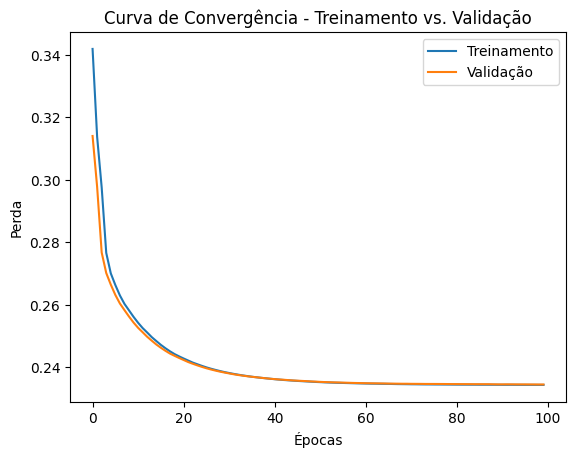

In [16]:
loss_train = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss_train, label='Treinamento')
plt.plot(val_loss, label='Validação')
plt.title('Curva de Convergência - Treinamento vs. Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

Curvas de perda do treinamento e validação estão quase iguais e diminuindo juntas ao longo das épocas, indicando que o modelo está aprendendo bem e não está sofrendo de overfitting.

In [17]:
model

<Sequential name=sequential, built=True>

Prevendo os rótulos de saída (as classes ou probabilidades) para os conjuntos de teste e treinamento, respectivamente.

In [18]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step


#Relatório de classificação

In [19]:
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
acuracia = accuracy_score(y_pred_class, y_test)
print("Acurácia no conjunto de teste:", acuracia)

Acurácia no conjunto de teste: 0.618425


In [21]:
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_class))

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.63      0.97      0.76    125418
           1       0.37      0.03      0.06     74582

    accuracy                           0.62    200000
   macro avg       0.50      0.50      0.41    200000
weighted avg       0.53      0.62      0.50    200000



<h1>Random Forest </h1>

In [ ]:
#codigo
